In [1]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy.ndimage import median_filter, gaussian_filter

# a) Đọc ảnh màu 'lena.jpg' và chuyển sang ảnh xám

In [2]:
image = cv2.imread('D:\imageprocessing\lena (1).jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# b) Thêm nhiễu muối tiêu và nhiễu Gaussian

In [3]:
salt_pepper_noise = random_noise(gray_image, mode='s&p', amount=0.05)  
gaussian_noise = random_noise(salt_pepper_noise, mode='gaussian', var=0.01) 

# c) Áp dụng lọc trung vị để giảm nhiễu muối tiêu

In [4]:
noisy_image = (gaussian_noise * 255).astype(np.uint8)
median_filtered = median_filter(noisy_image, size=3)


# d) Áp dụng lọc Gaussian để xử lý nhiễu Gaussian còn lại

In [5]:
gaussian_filtered = gaussian_filter(median_filtered, sigma=1)

# e) Tính PSNR và SSIM giữa ảnh gốc và ảnh sau khi lọc

In [6]:
psnr_median_gaussian = psnr(gray_image, gaussian_filtered)
ssim_median_gaussian = ssim(gray_image, gaussian_filtered, data_range=gaussian_filtered.max() - gaussian_filtered.min())

print(f"PSNR sau lọc trung vị và lọc Gaussian: {psnr_median_gaussian}")
print(f"SSIM sau lọc trung vị và lọc Gaussian: {ssim_median_gaussian}")

PSNR sau lọc trung vị và lọc Gaussian: 25.896306294276314
SSIM sau lọc trung vị và lọc Gaussian: 0.6602068275759739


# f) Thử nghiệm thay đổi thứ tự lọc và tính lại PSNR và SSIM

In [7]:
gaussian_then_median = median_filter(gaussian_filter(noisy_image, sigma=1), size=3)
psnr_gaussian_then_median = psnr(gray_image, gaussian_then_median)
ssim_gaussian_then_median = ssim(gray_image, gaussian_then_median, data_range=gaussian_then_median.max() - gaussian_then_median.min())

print(f"PSNR sau lọc Gaussian rồi lọc trung vị: {psnr_gaussian_then_median}")
print(f"SSIM sau lọc Gaussian rồi lọc trung vị: {ssim_gaussian_then_median}")

PSNR sau lọc Gaussian rồi lọc trung vị: 25.287256070027585
SSIM sau lọc Gaussian rồi lọc trung vị: 0.5925320545328254


# g) Hiển thị ảnh trước và sau khi lọc theo các thứ tự lọc khác nhau để so sánh

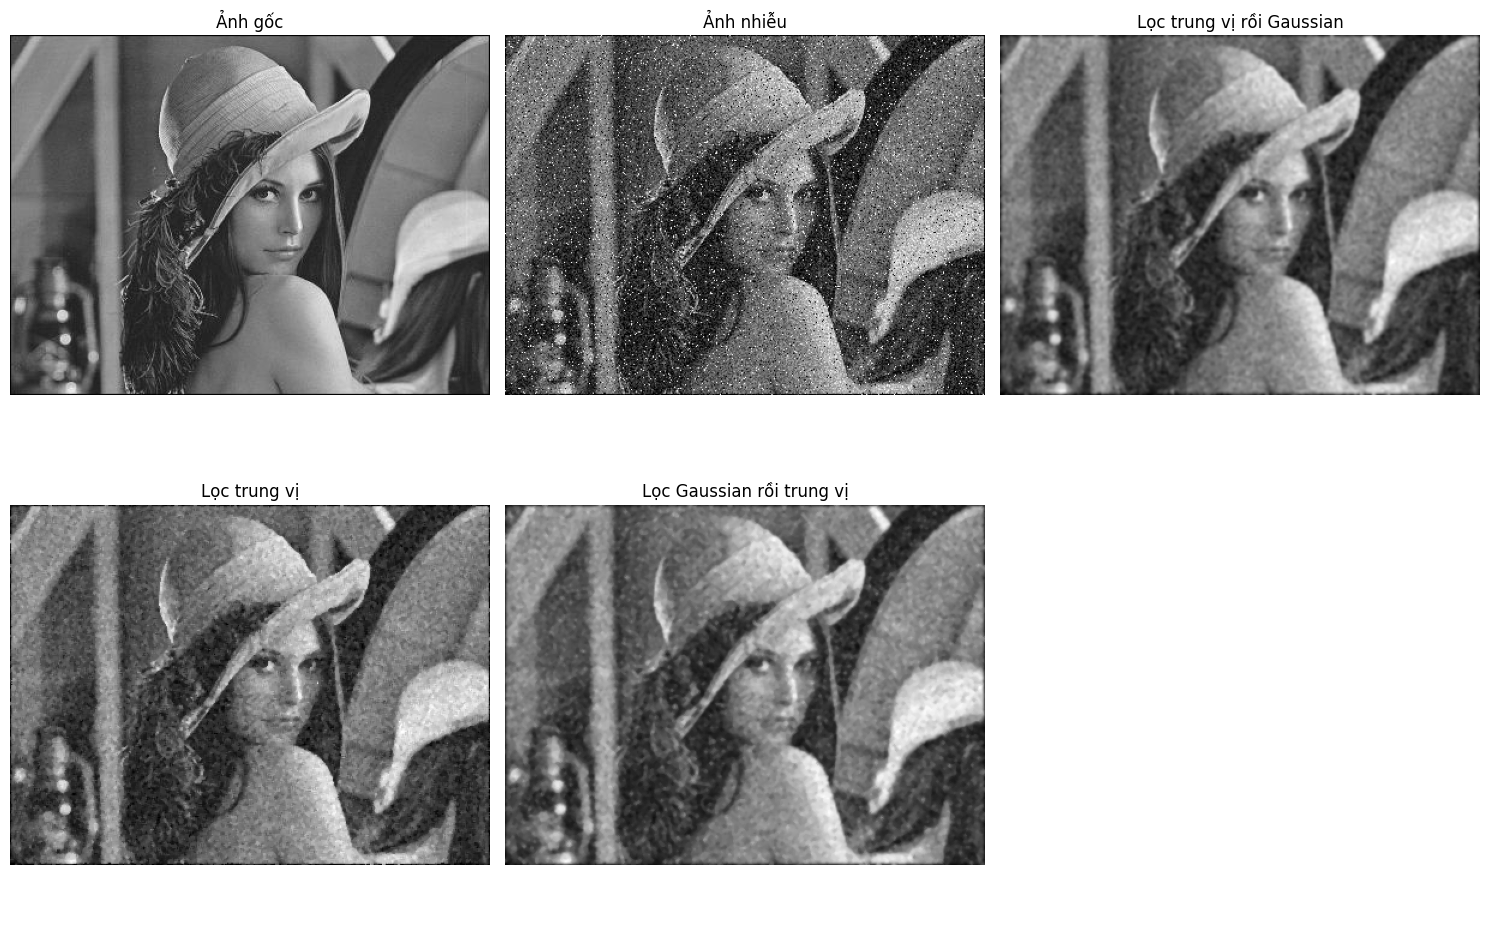

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Ảnh gốc')

axes[0, 1].imshow(noisy_image, cmap='gray')
axes[0, 1].set_title('Ảnh nhiễu')

axes[0, 2].imshow(gaussian_filtered, cmap='gray')
axes[0, 2].set_title('Lọc trung vị rồi Gaussian')

axes[1, 0].imshow(median_filtered, cmap='gray')
axes[1, 0].set_title('Lọc trung vị')

axes[1, 1].imshow(gaussian_then_median, cmap='gray')
axes[1, 1].set_title('Lọc Gaussian rồi trung vị')

for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

# Nhận xét  : 
##  Lọc trung vị nên được áp dụng trước để xử lý nhiễu muối tiêu, sau đó lọc Gaussian hoặc trung bình giúp xử lý nhiễu Gaussian tốt hơn.